# Hello, Entangled World

As an example of how we can work with two qubits in Qiskit, we are going to implement a circuit that prepares an entangled state (a Bell pair)

In [62]:
#imports
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

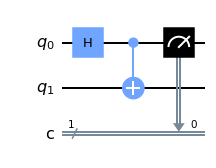

In [63]:
qc = QuantumCircuit(2,2) #create quantum circuit with two qubits and two␣ ↪classical bits


qc.h(0) # Apply H-gate to firt qubit to create superposition
qc.cx(0,1) #Apply CNOT gate to first qubit to entangle it with second qubit qc.measure(range(2),range(2)) #measure each qubit
qc.draw() #draw circuit

Execute the circuit 4000 times and print the results

{'1': 493, '0': 507}


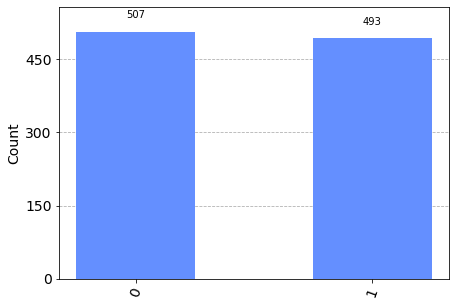

In [64]:
backend_sim = Aer.get_backend('qasm_simulator') # choose local simulator as␣ ↪backend
job_sim = execute(qc, backend_sim, shots=4000) #execute 4000 times result_sim = job_sim.result() # collect results
counts = result_sim.get_counts(qc) # get and visualize result frequency print(counts)
plot_histogram(counts)

Directly access the amplitudes and probabilities of the states. Remove the measurement and use the statevector simulator.

In [65]:
qc_2 = QuantumCircuit(2,2) #create a similar quantum circuit without measurement qc_2.h(0) # Apply H-gate to firt qubit to create superposition
qc_2.cx(0,1) #Apply CNOT gate to first qubit to entangle it with second qubit

backend_sim_statevec = Aer.get_backend('statevector_simulator') # select␣ ↪statevector simulator as backend
job_sim_2 = execute(qc_2, backend_sim_statevec) #execute simulator result_sim_2 = job_sim_2.result() # collect results
counts_2 = result_sim_2.get_counts(qc_2) # get and visualize result frequency outputstate = result_sim_2.get_statevector(qc_2)
print(outputstate)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


Run the circuit on an actual computer. To reducet the wait, exercute on the computer with the fewest pending jobs. Let's check their properties, after loading my account, with the order backend_overview()

In [66]:
provider = IBMQ.load_account()
backend_overview()

ibmqfactory.load_account:WARNING:2022-12-07 17:34:47,364: Credentials are already in use. The existing account in the session will be replaced.


ibm_oslo                     ibm_nairobi                  ibmq_manila
--------                     -----------                  -----------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 29             Pending Jobs: 22             Pending Jobs: 21
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      149.3          Avg. T1:      114.6          Avg. T1:      181.8
Avg. T2:      79.2           Avg. T2:      88.9           Avg. T2:      58.3



ibmq_quito                   ibmq_belem                  ibmq_lima
----------                   ----------                  ---------
Num. Qubits:  5              Num. Qubits:  5             Num. Qubits:  5
Pending Jobs: 18             Pending Jobs: 1             Pending Jobs: 78
Least busy:   False          Least busy:   True          Least busy:   False
Operational:  True           Operational

Access more details of a particular computer with the following command:

In [67]:
backend_monitor(provider.get_backend("ibmq_belem"))

ibmq_belem
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 1
    backend_version: 1.0.52
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    sample_name: family: Falcon, revision: 4, segment: T
    meas_map: [[0, 1, 2, 3, 4]]
    dynamic_reprate_enabled: True
    url: None
    rep_delay_range: [0.0, 500.0]
    pulse_num_channels: 9
    live_data: False
    allow_object_storage: True
    n_uchannels: 8
    qubit_lo_range: [[4.590214309124385, 5.590214309124385], [4.745527978802157, 5.745527978802157], [4.861500429712459, 5.861500429712459], [4.670321749733135, 5.670321749733135], [4.758434047927452, 5.758434047927452]]
    n_registers: 1
    quantum_volume: 16
    input_allowed: ['job', 'runtime']
    meas_levels: [1, 2]
    dtm: 0.2222222222222222
    memory: True
    max_shots: 20000
    conditional: False
    u_channel_lo: [[{'q': 1, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}],

Select the least busy device and run our circuit on it.

In [82]:
from qiskit.providers.ibmq import least_busy

#we execute on the least busy device (among the actual quantum computers)
backend = least_busy(provider.backends(operational = True, simulator=False,
                                       status_msg='active',
                                       filters=lambda x: x.configuration().n_qubits > 1))
print("We are executign on...",backend)
print("it has ",backend.status().pending_jobs,"pending jobs")
job_exp = execute(qc_2, backend=backend)
job_monitor(job_exp)

We are executign on... ibm_nairobi
it has  5 pending jobs
Job Status: job has successfully run


Once I have run the job, draw the results and compare them to the one obtained by the simulator.

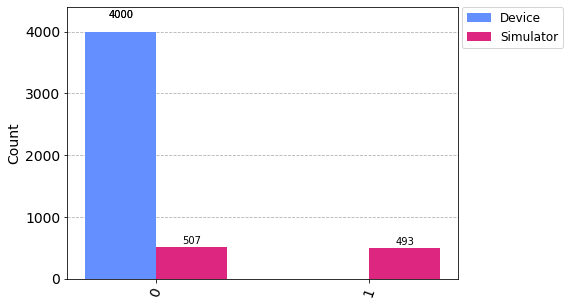

In [83]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

In [ ]:
#This plot shows a clear difference betweeen simulator results and quantum computer results. The simulator always measures the circuit in either |00> or |11> (both qubits measuring the same value). Each state ie measured about half the time. The quantum computer measures the circuit at either |00> or |11> mostly but not always. Around 10% of the time the |10> or |01> state is measured. This violates the bell state because qubits entangled through the CNOT gate in this experiment should always be in the same state. This violation is due to the fact that quantum computers, unlike classical simulators, are not ideal machines and can be subject to noise.dddd

This plot shows a clear difference betweeen simulator results and quantum computer results. The simulator always measures the circuit in either |00> or |11> (both qubits measuring the same value). Each state ie measured about half the time. The quantum computer measures the circuit at either |00> or |11> mostly but not always. Around 10% of the time the |10> or |01> state is measured. This violates the bell state because qubits entangled through the CNOT gate in this experiment should always be in the same state. This violation is due to the fact that quantum computers, unlike classical simulators, are not ideal machines and can be subject to noise.

In [ ]:
#By performing this experiment I learned how to implement the theory of quantum superposition and entanglement using IBM qiskit. The qiskit library, which can be imported into any Python program, contains all the functions one needs to construct, simulate, and execute quantum circuits. I started by creating a two-qubit circuit with a classical bit, to which I applied an H gate to put the qubits in superposition. Next, I applied a CNOT gate to entangle the qubits and create a Bell state. I learned how to run this circuit using the local simulator, which uses my laptop CPU (classical computer, not quantum). I also learned how to run this experiment using a real quantum computer. I learned to browse available machines and pick the one with fewest jobs queued. I finally visualized the results of both methods using a histogram. This experiment reinforced my understanding of a Bell state as a two qubit system where the qubits are entangled with each other due to a CNOT gate. This experiment also helped me learn that while a classical simulator gives ideal results consistent with theory, quantum computers are subject to noise and give slightly less accurate results.

By performing this experiment I learned how to implement the theory of quantum superposition and entanglement using IBM qiskit. The qiskit library, which can be imported into any Python program, contains all the functions one needs to construct, simulate, and execute quantum circuits. I started by creating a two-qubit circuit with a classical bit, to which I applied an H gate to put the qubits in superposition. Next, I applied a CNOT gate to entangle the qubits and create a Bell state. I learned how to run this circuit using the local simulator, which uses my laptop CPU (classical computer, not quantum). I also learned how to run this experiment using a real quantum computer. I learned to browse available machines and pick the one with fewest jobs queued. I finally visualized the results of both methods using a histogram. This experiment reinforced my understanding of a Bell state as a two qubit system where the qubits are entangled with each other due to a CNOT gate. This experiment also helped me learn that while a classical simulator gives ideal results consistent with theory, quantum computers are subject to noise and give slightly less accurate results.